In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
%matplotlib inline

In [2]:
# load dataset
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [3]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px =  train_set_x_orig[0].shape[0]

In [6]:
# flatten an image
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T


In [7]:
# standardizing the dataset

train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255


In [8]:
# helper functions 

def sigmoid(z):
    """
    Compute the sigmoid of z
    
    Arguments: 
    z -- A scalar numpy array of any size
    
    
    Return:
    s -- sigmoid(z)
    """
    
    s = 1/(1+np.exp(-z))
    
    return s
    

In [10]:
# unit test the code
sigmoid(np.array([0,2]))

array([0.5       , 0.88079708])

In [11]:
# initializing the parameters

def initialize_with_zeros(dim):
    """
    Initializes the parameters with 0 weights
    
    Arguments: 
    dim -- size of W vector the we want
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)

    """
    
    w = np.zeros((dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [15]:
dim = 2
w, b = initialize_with_zeros(dim)
print(w)
print(b)

[[0.]
 [0.]]
0


In [28]:
# forward propogation  

def propagate(w, b, X, Y):
    """
    Implement cost function and its gradient for the propogation explained above
    
    Arguments:  
    w -- weights, a numpy array of size(num_px*num_px*3,1)
    b -- bias, a scalar
    X -- data of size (num_px*num_px*3, number of examples)
    Y -- true "label" vector (containing 0 for non-cat, and 1 for cat) of size(1, number of examples)
    
    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of loss with respect to w, thus same shape to w
    db -- gradient of loss with respect to b, thus same shape to b

    """
    m = X.shape[1]
    # forward pass
    z = w.T.dot(X)+b
    a = sigmoid(z)
    
    # loss calculation
    cost = (-1/m)*(np.sum(np.multiply(Y,np.log(a))+np.multiply((1-Y),np.log(1-a))))
    
    
    # derivatives 
    dw = (1/m)*X.dot((a-Y).T)
    db = (1/m)* np.sum(a-Y)
    
    
    grads = {"dw":dw, "db":db}
    
    return grads, cost
    

In [29]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [31]:
# update the parameters using gradient descent

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False ):
    
    """
    This function optimizes w and b by running a gradient descent
    
    Arguments:
    w -- weights, a numpy array of size(num_px * num_px * 3, 1)
    b -- a scalar value
    X -- input array of size (num_px * num_px * 3, m)
    Y -- true labels to calculate the cost (1, number of examples)
    num_iterations -- the number of iterations over which to run the gradient descent
    learning_rate -- rate at which the gradient descent jumps
    
    Returns:
    params -- dictionary containing updated w and b
    grads -- dictionalry containing updated dw and db values
    costs -- list of all the costs computed during the optimization. plotting the learning curve
    
    
    """
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        # retrieve dw and db
        dw = grads["dw"]
        db = grads["db"]
        
        # update the values
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # record 
        if i % 100 == 0:
            costs.append(cost)
    
    params = {"w":w,
             "b":b}
    grads = {"dw":dw,
            "db":db}
    
    return params, grads, costs

In [32]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))


w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


In [39]:
# predict

def predict(w, b, X):
    """
    Predicts the labels of the test data
    
    Arguments:
    weights -- weight of numpy array learnt after gradient descent
    b -- bias, a scalar
    X -- data of size (num_px*num_px*3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array of predited values of size (1, number of examples)
    """
    
    m = X.shape[1]
    Y_pred = np.zeros((1,m))
    
    
    A = sigmoid(w.T.dot(X)+b)
    print(A.shape)
    
    for i in range(A.shape[1]):
        
        if A[0,i] > 0.5:
            Y_pred[0,i] = 1 
        else:
            Y_pred[0,i] = 0
    
    assert(Y_pred.shape == (1,m))
    
    return Y_pred
    
    
    

In [40]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

(1, 3)
predictions = [[1. 1. 0.]]


In [52]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    
    # initialize the parameters 
    w,b = initialize_with_zeros(X_train.shape[0])
    
    # propogate
    grads, cost = propagate(w, b, X_train, Y_train)
    
    # optimize
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    w = params["w"]
    b = params["b"]
    
    #predict
    y_pred_test = predict(w, b, X_test)
    y_pred_train = predict(w, b, X_train)
    
    # accuracy 
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": y_pred_test, 
         "Y_prediction_train" : y_pred_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [55]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 50000, learning_rate = 0.005, print_cost = True)

(1, 50)
(1, 209)
train accuracy: 100.0 %
test accuracy: 72.0 %


[0.69314718 0.58450836 0.46694904 0.37600687 0.33146329 0.30327307
 0.27987959 0.26004214 0.24294068 0.22800422 0.21481951 0.20307819
 0.19254428 0.18303334 0.17439859 0.1665214  0.15930452 0.15266732
 0.14654224 0.14087208]


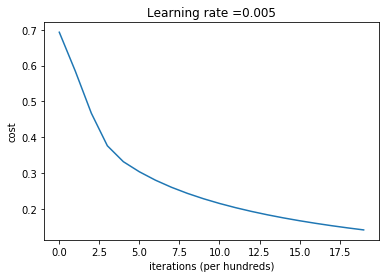

In [51]:
# learning curve
print(costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()


learning rate is: 0.01
(1, 50)
(1, 209)
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
(1, 50)
(1, 209)
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
(1, 50)
(1, 209)
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



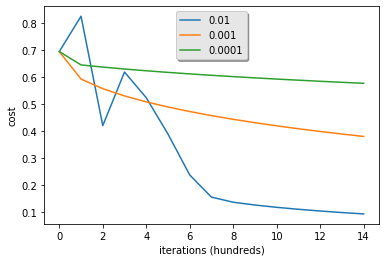

In [56]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [59]:
# predicting a picture
my_image = "WIN_20200501_13_53_39_Pro.jpg"

image = np.array(ndimage.imread(my_image, flatten=False))
image = image/255
my_image = scipy.misc.imresize(image, size=(num_px, num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

(1, 1)


C:\Users\paura\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
C:\Users\paura\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


y = 1.0, your algorithm predicts a "cat" picture.


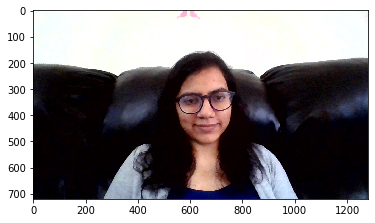

In [60]:
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")